import libraries and read data

In [80]:
#!pip uninstall eodal -y
#!pip install git+https://github.com/lukasValentin/eodal.git@landsat-dev

In [81]:
#import what is needed
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from datetime import datetime
from pathlib import Path
from shapely.geometry import box
from matplotlib import pyplot as plt
from shapely.geometry import Point

from eodal.config import get_settings
from eodal.core.sensors import Landsat
from eodal.core.scene import SceneCollection
from eodal.mapper.feature import Feature
from eodal.core.raster import RasterCollection

In [82]:
# # read data from pickled file object into SceneCollectio
# fpath = Path('S:\MSc_23_TimckeFinn\data\EOdal\data_test.pkl')
# scoll = SceneCollection.from_pickle(stream=fpath)
# scoll

In [83]:
fpath_raster = Path('S:\MSc_23_TimckeFinn\data\EOdal\landsat_median_composite_2022.tif')
#read tiff from disk:
composite_tif = RasterCollection.from_multi_band_raster(fpath_raster=fpath_raster)

In [87]:
# Reshape the raster data to have the shape (pixels, bands)
raster_data = composite_tif.get_values()

# Extract the first 6 bands
selected_bands = raster_data[:, :, :]

# Reshape the selected bands to have the shape (pixels, bands)
bands, rows, columns = selected_bands.shape
reshaped_data = selected_bands.reshape((bands, rows * columns)).T

# Create a DataFrame from the reshaped data
df = composite_tif.to_dataframe()

# Extract x and y coordinates into new columns
df['x_coordinate'] = df['geometry'].apply(lambda point: Point(point).x)
df['y_coordinate'] = df['geometry'].apply(lambda point: Point(point).y)

# Create a KMeans instance
kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)  # Set the desired number of clusters

# Fit the KMeans model to the data
kmeans.fit(reshaped_data)

# Get the cluster labels
labels = kmeans.labels_
print(labels.shape)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

#print("processed Data", raster_data.shape)
display(df)


(77024,)


,geometry,blue_median,green_median,red_median,nir08_median,swir16_median,x_coordinate,y_coordinate,Cluster
0,POINT (865425.000 51435.000),0.087230,0.095780,0.093700,0.177420,0.144570,865425.0,51435.0,0
1,POINT (865425.000 51405.000),0.085120,0.095040,0.090740,0.177420,0.142820,865425.0,51405.0,5
2,POINT (865425.000 51375.000),0.085250,0.095450,0.089370,0.181420,0.144450,865425.0,51375.0,0
3,POINT (865425.000 51345.000),0.084410,0.096020,0.090160,0.176720,0.142430,865425.0,51345.0,0
4,POINT (865425.000 51315.000),0.084240,0.095310,0.089830,0.168540,0.137610,865425.0,51315.0,0
...,...,...,...,...,...,...,...,...,...
77019,POINT (875355.000 44625.000),0.078870,0.085175,0.081030,0.164750,0.115825,875355.0,44625.0,1
77020,POINT (875355.000 44595.000),0.078565,0.085025,0.080840,0.165790,0.116165,875355.0,44595.0,4
77021,POINT (875355.000 44565.000),0.078650,0.084585,0.080760,0.167800,0.114845,875355.0,44565.0,1
77022,POINT (875355.000 44535.000),0.078660,0.084505,0.080575,0.162785,0.113670,875355.0,44535.0,1


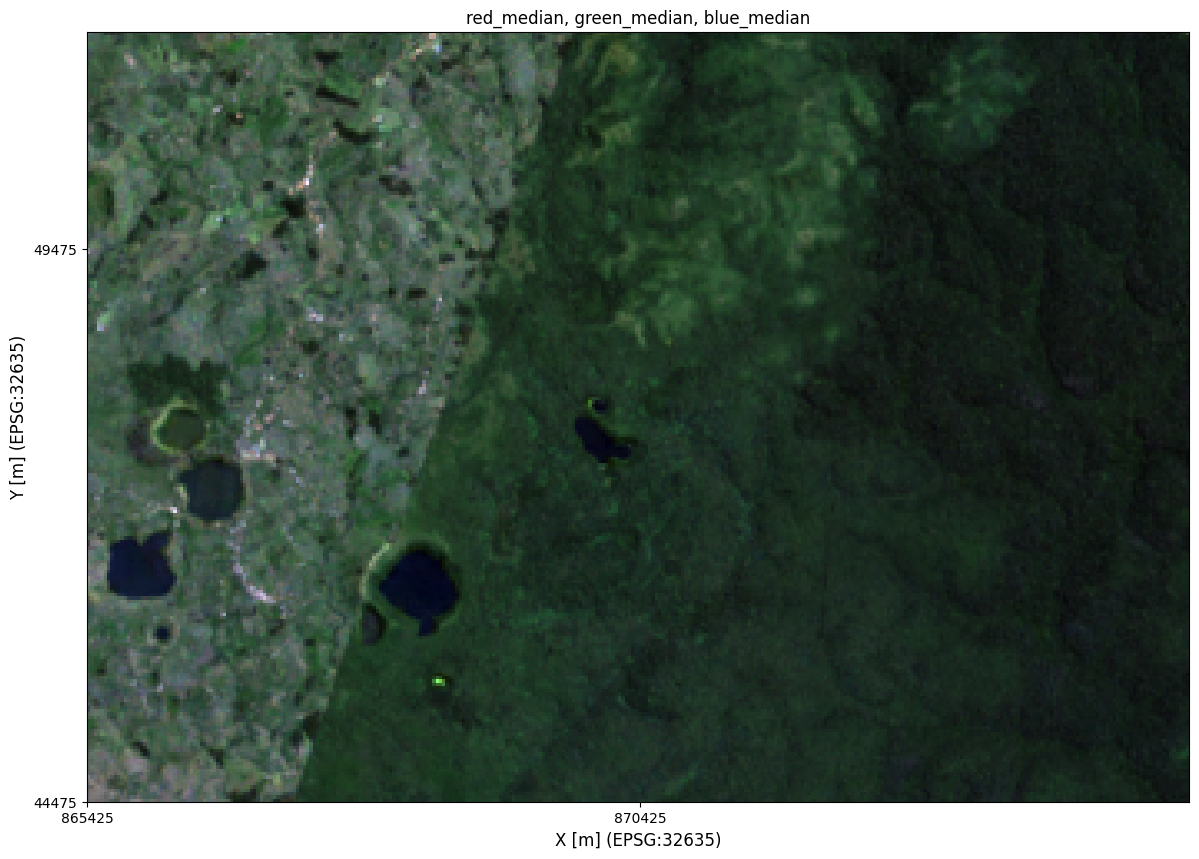

In [88]:
# plot composite
f, ax = plt.subplots(figsize=(20, 10))
f = composite_tif.plot_multiple_bands(['red_median', 'green_median', 'blue_median'], ax=ax)


(232, 332)


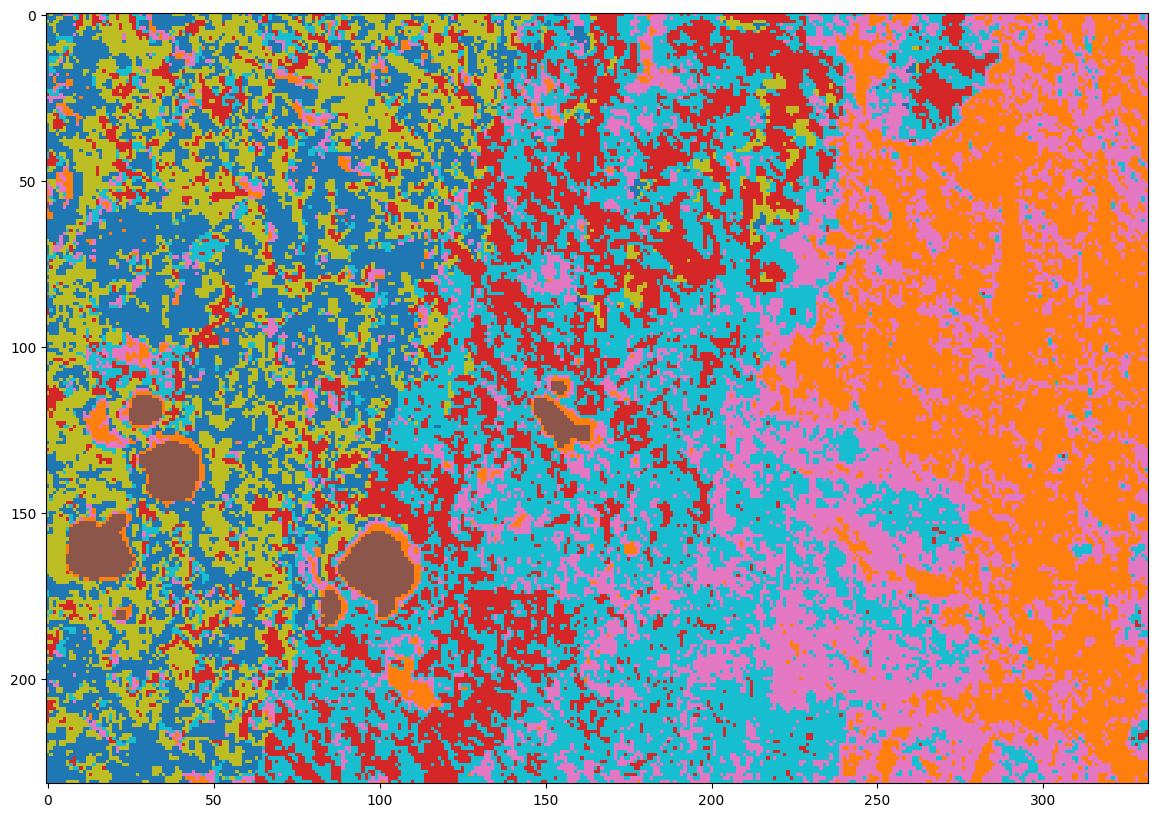

In [89]:
# Reshape the labels back to the original shape of raster_data
labels_reshaped = labels.reshape((rows, columns))
print(labels_reshaped.shape)

#Plot Cluster
f, ax = plt.subplots(figsize=(20, 10))
f = plt.imshow(labels_reshaped, cmap='tab10')
